In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# just need to load the data for plotting 
qr_data = quantileRegression("data")
qr_dataE = quantileRegression("data")
qr_dataF = quantileRegression("data")
qr_dataG = quantileRegression("data")
qr_dataH = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 1000000
print "Load the data dataframe"
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016D[1])
qr_dataE.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016E[0],rn.run2016E[1])
qr_dataF.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016F[0],rn.run2016F[1])
qr_dataG.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016G[0],rn.run2016G[1])
qr_dataH.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016H[0],rn.run2016H[1])
dfdata = qr_data.getDF()
dfdataE = qr_dataE.getDF()
dfdataF = qr_dataF.getDF()
dfdataG = qr_dataG.getDF()
dfdataH = qr_dataH.getDF()

Load the data dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'puweight', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadScEnergy', 'leadScPreshowerEnergy', 'leadSigmaRR', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadPhoIDMVA', 'leadR9', 'leadS4', 'leadEtaWidth', 'leadPhiWidth', 'leadSigmaIeIe', 'leadCovarianceIetaIphi', 'leadCovarianceIphiIphi', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadScEnergy', 'subleadScPreshowerEnergy', 'subleadSigmaRR', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subLeadPhoIDMVA', 'subleadR9', 'subleadS4', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadSigmaIeIe', 'subleadCovarianceIetaIphi', 'subleadCovarianceIphiIphi']
trees:  ['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEL

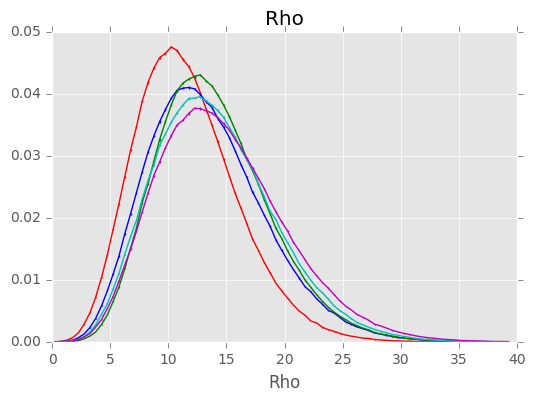

In [8]:
rv=np.arange(0,40,0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
#plot histograms
plot.plotHistErr(qr_data.df.loc[:,"rho"], rv,Color="r")
plot.plotHistErr(qr_dataE.df.loc[:,"rho"], rv,Color="b")
plot.plotHistErr(qr_dataF.df.loc[:,"rho"], rv,Color="g")
plot.plotHistErr(qr_dataG.df.loc[:,"rho"], rv,Color="c")
plot.plotHistErr(qr_dataH.df.loc[:,"rho"], rv,Color="m")
ax.set_title("Rho")

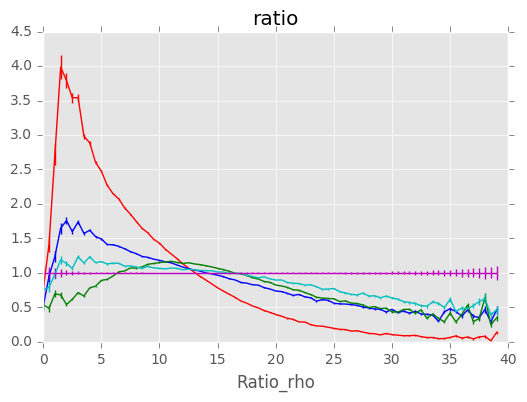

In [9]:
import Plotting as plott
#so the pileup is different for every run, let's do the ratio first:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio_rho")

#Do the Ratio wrt the last 
plot.plotHistRatio(qr_data.df.loc[:,"rho"],qr_dataH.df.loc[:,"rho"],rv, Color="r")
plot.plotHistRatio(qr_dataE.df.loc[:,"rho"],qr_dataH.df.loc[:,"rho"],rv, Color="b")
plot.plotHistRatio(qr_dataF.df.loc[:,"rho"],qr_dataH.df.loc[:,"rho"],rv, Color="g")
plot.plotHistRatio(qr_dataG.df.loc[:,"rho"],qr_dataH.df.loc[:,"rho"],rv, Color="c")
plot.plotHistRatio(qr_dataH.df.loc[:,"rho"],qr_dataH.df.loc[:,"rho"],rv, Color="m")

ax.set_title('ratio')

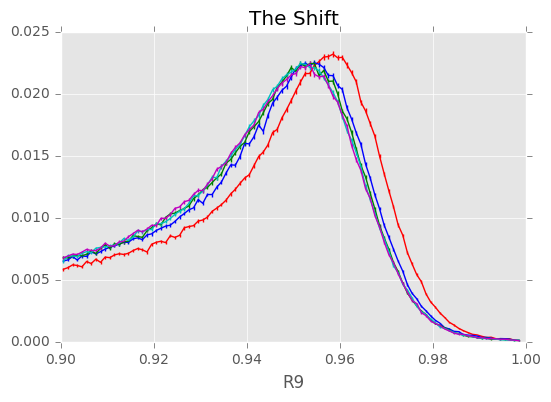

In [7]:
rv2 = np.arange(0.9,1.0,0.001)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")

plot.plotHistErr(qr_data.df.loc[:,"R9"], rv2,Color="r")
plot.plotHistErr(qr_dataE.df.loc[:,"R9"], rv2,Color="b")
plot.plotHistErr(qr_dataF.df.loc[:,"R9"], rv2,Color="g")
plot.plotHistErr(qr_dataG.df.loc[:,"R9"], rv2,Color="c")
plot.plotHistErr(qr_dataH.df.loc[:,"R9"], rv2,Color="m")    

ax.set_title('The Shift')
    
    